In [34]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
from ipynb.fs.defs.gBAOAB import gBAOAB_integrator
import torch
import numpy as np
import torch
from torch.autograd.functional import jacobian
import matplotlib.pyplot as plt
import numpy as np
from physt import special_histograms
import scipy
from matplotlib.colors import Normalize


In [35]:
torch.set_default_dtype(torch.double)
torch.set_num_threads(2)

In [36]:
def potential_1(x):
    # setting potential to (x^2 -1) + ...
    y = torch.squeeze(x**2)
    return torch.dot(y-1,y-1)

def force_1(x):
    return torch.squeeze(jacobian(potential_1, x), dim = 0)



In [99]:
def pi_1(x,y):
    z = np.sqrt(1- x**2 - y**2)
    return np.exp(-(x**2 -1)**2 -(y**2 -1)**2 -(z**2 -1)**2  )

In [100]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm


phi = np.linspace(0, np.pi, 200)
theta = np.linspace(0, 2*np.pi, 200)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)


m, l = 2, 3


# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolor = pi_1(x,y)

#norm = Normalize(fcolor.min(), fcolor.max())
#fcolors= norm(fcolor)


# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolor),vmin = 0, vmax = 5)
ax.set_xticks([-1,-.75,-.5,-.25,0,.25,.5,.75,1])
ax.set_zticks([-1,-.75,-.5,-.25,0,.25,.5,.75,1])
#ax.grid(False)
colorbar = fig.colorbar(surface, ax=ax)
# Turn off the axis planes
#ax.set_axis_off()
plt.savefig("globe_surface.pdf")

C:\Users\Tadgh\AppData\Local\Temp\ipykernel_25400\530744276.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m)


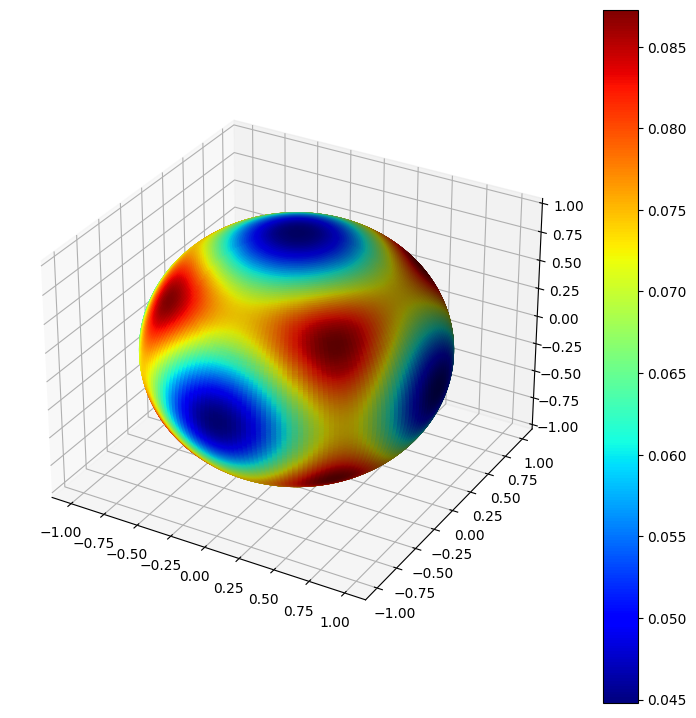

In [168]:
fcolor.max()

In [158]:
np.shape(x)

In [159]:
np.shape(fcolors)

In [160]:
x_init = torch.tensor([[1.],[0.], [0.]])
v_init = torch.tensor([[0.],[0.],[0.]])
h = 0.25
gs = [lambda x: x[0] ** 2 + x[1]**2 + x[2]** 2 - 1 ]
M = torch.eye(3)
lamb = torch.tensor([0.])

positions, velocities = gBAOAB_integrator(x_init,v_init, force_1,gs, h,M, 1, 1, 50,0,1)

In [161]:
velocities_1 = [vel[0] for vel in velocities]
forces_1 = [force_1(torch.tensor(x))[0] for x in positions]
plt.plot(velocities_1, label="Velocities")
plt.plot(forces_1, label="Force")
plt.legend()

(999999, 3)

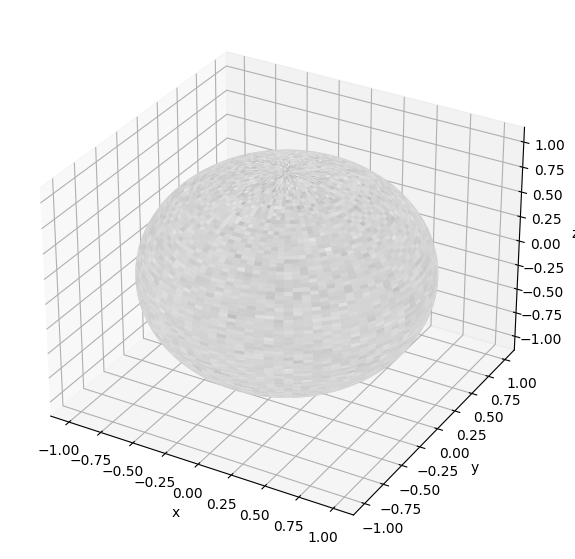

In [167]:
#vels = np.load('vel.npy',allow_pickle=True)
pos = np.load('pos2.npy',allow_pickle=True)

In [165]:
positions = np.concatenate([[po.numpy() for po in posits] for posits in pos])

290287.6843184275

In [166]:
data = positions
# Get histogram data (in spherical coordinates)
h = special_histograms.spherical_surface(data,theta_bins =50, phi_bins =50, density = True)
# Change the number of bins

# And plot its projection on a globe
ax = h.plot.globe_map(density = True,figsize=(7, 7), cmap="seismic", radius =1, show_colorbar=True, colorbar =True)
fig = ax.get_figure()
plt.savefig("globe_map_hist.pdf")

0.0

In [ ]:
(h.densities/300000).max()

## Functions of observables

In [ ]:
np.shape(data)

In [ ]:
from spherical_stats import spherical_hist

In [ ]:
h, x, y, z = spherical_hist(data,100)

In [ ]:
np.shape(h)

In [ ]:
h.max()
h.min()

In [ ]:
hnorm = Normalize(h.min(), h.max())
hn= hnorm(h)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sface = ax.plot_surface(
x, y, z, rstride=1, cstride=1, alpha = 1, facecolors=cm.seismic(hn))
colorbar = fig.colorbar(surface, ax=ax)
plt.savefig('densityplot2.pdf')

In [ ]:
h.plot.globe_map(density = True,figsize=(7, 7), cmap="seismic", radius =1, show_colorbar=True, colorbar =True)

In [ ]:
h.densities/300000

In [ ]:
~~pos = np.transpose(pos)

In [ ]:
# a function sending n tensors to the mean of the cos-1 z
def theta(t):
    return np.arccos(t[2].numpy())

def phi(t):
    #return np.sign(t[1].numpy())* np.arccos(t[0].numpy()/np.sqrt(t[0]**2 + t[1]**2))
    return np.arctan2(t[1].numpy(), t[0].numpy()) + np.pi

def avg_phi(arr):
    return np.array([phi(t) for t in arr]).mean()


def avg_theta(arr):
    return np.array([theta(t) for t in arr]).mean()

In [ ]:
np.arccos(0.28)

In [ ]:
t= torch.tensor([0,1,0])

In [ ]:
phi(t)

In [ ]:
thetas =[avg_theta(arr) for arr in pos]
cum_thetas = np.cumsum(thetas)/range(1,len(thetas)+1)


phis =[avg_phi(arr) for arr in pos]
cum_phis = np.cumsum(phis)/range(1,len(phis)+1)

In [ ]:
np.min(thetas)
# so there's something wrong with my thetas fn

In [ ]:
np.min(phis)

# So these do line up with theoretical values of $\pi$ and $\frac{\pi}{2}$

In [ ]:
# note- for the trapezoidal rule just take away 1/2(l[0]) + 1/2(l)

In [21]:
def pi_1(theta ,phi):
    return np.exp(-(np.cos(theta)**2 -1)**2 -(np.cos(phi)**2 * np.sin(theta)**2 -1)**2 -(np.cos(phi)**2 * np.sin(theta)**2 -1)**2)

def pi_2(theta ,phi):
    return phi*np.exp(-(np.cos(theta)**2 -1)**2 -(np.cos(phi)**2 * np.sin(theta)**2 -1)**2 -(np.cos(phi)**2 * np.sin(theta)**2 -1)**2)

def pi_3(theta ,phi):
    return theta*np.exp(-(np.cos(theta)**2 -1)**2 -(np.cos(phi)**2 * np.sin(theta)**2 -1)**2 -(np.cos(phi)**2 * np.sin(theta)**2 -1)**2)

In [ ]:
import scipy
from scipy.integrate import dblquad

x,_ = scipy.integrate.dblquad(pi_2, 0, np.pi, 0, 2*np.pi)
y,_ = scipy.integrate.dblquad(pi_1, 0, np.pi, 0, 2*np.pi)
z,_ = scipy.integrate.dblquad(pi_3, 0, np.pi, 0, 2*np.pi)

In [ ]:
x/y

In [91]:
z/y

In [94]:
#vels = np.load('vel.npy',allow_pickle=True)
pos = np.load('pos_t2.npy',allow_pickle=True)
h_es=[0.001, 0.01, 0.1,0.2,0.3]

In [95]:
thetas =[[avg_theta(arr) for arr in np.transpose(po)] for po in pos]
cum_thetas = [np.cumsum(theta)/range(1,len(theta)+1) for theta in thetas]


phis =[[avg_phi(arr) for arr in np.transpose(po)] for po in pos]
cum_phis = [np.cumsum(phi)/range(1,len(phi)+1) for phi in phis]

3.0201441428592926

In [ ]:
plt.title("Convergence of $\\theta$")
for i in range(len(thetas)):
    plt.plot(cum_thetas[i], label = f"Step size: {h_es[i]}")
plt.legend()

In [ ]:
positions_es = []

In [ ]:
for h in [0.001,0.01, 0.1, 1]:
    x_init = torch.tensor([[1.],[0.], [0.]])
    v_init = torch.tensor([[0.],[0.],[0.]])
    gs = [lambda x: x[0] ** 2 + x[1]**2 + x[2]** 2 - 1 ]
    M = torch.eye(3)
    positions, _ = gBAOAB_integrator(x_init,v_init, force_1,gs, h,M, 1, 1, int(10/h))
    positions_es.append(positions)

In [ ]:
positions_es

In [ ]:
plt.title("Convergence of $ \phi$")
for i in range(len(thetas)):
    plt.plot(cum_phis[i], label = f"Step size: {h_es[i]}")
plt.legend()

In [ ]:
thetas =[[avg_theta(arr) for arr in np.transpose(po)] for po in pos]
cum_thetas = [np.cumsum(theta)/range(1,len(theta)+1) for theta in thetas]


phis =[[avg_phi(arr) for arr in np.transpose(po)] for po in pos]
cum_phis = [np.cumsum(phi)/range(1,len(phi)+1) for phi in phis]

# Squared observables

In [ ]:
# a function sending n tensors to the mean of the cos-1 z
def theta_2(t):
    return np.arccos(t[2].numpy())**2

def phi_2(t):
    #return np.sign(t[1].numpy())* np.arccos(t[0].numpy()/np.sqrt(t[0]**2 + t[1]**2))
    return (np.arctan2(t[1].numpy(), t[0].numpy()) + np.pi)**2

def avg_phi_2(arr):
    return np.array([phi_2(t) for t in arr]).mean()


def avg_theta_2(arr):
    return np.array([theta_2(t) for t in arr]).mean()

In [ ]:
thetas_2 =[[avg_theta_2(arr) for arr in np.transpose(po)] for po in pos]
cum_thetas_2 = [np.cumsum(theta)/range(1,len(theta)+1) for theta in thetas_2]


phis_2 =[[avg_phi_2(arr) for arr in np.transpose(po)] for po in pos]
cum_phis_2 = [np.cumsum(phi)/range(1,len(phi)+1) for phi in phis_2]

In [ ]:
plt.title("Convergence of $\\theta^2$")
for i in range(len(thetas_2)):
    plt.plot(cum_thetas_2[i], label = f"Step size: {h_es[i]}")
plt.legend()

In [ ]:
plt.title("Convergence of $\phi^2$")
for i in range(len(thetas)):
    plt.plot(cum_phis_2[i], label = f"Step size: {h_es[i]}")
plt.legend()

In [ ]:
def pi_1(theta, phi):
    return np.exp(-(np.cos(theta) ** 2 - 1) ** 2 - (np.cos(phi) ** 2 * np.sin(theta) ** 2 - 1) ** 2 - (
                np.sin(phi) ** 2 * np.sin(theta) ** 2 - 1) ** 2)


def pi_2(theta, phi):
    return phi  * np.exp(-(np.cos(theta) ** 2 - 1) ** 2 - (np.cos(phi) ** 2 * np.sin(theta) ** 2 - 1) ** 2 - (
                np.sin(phi) ** 2 * np.sin(theta) ** 2 - 1) ** 2)


def pi_3(theta, phi):
    return theta**2 * np.exp(-(np.cos(theta) ** 2 - 1) ** 2 - (np.cos(phi) ** 2 * np.sin(theta) ** 2 - 1) ** 2 - (
                np.sin(phi) ** 2 * np.sin(theta) ** 2 - 1) ** 2)


x, _ = scipy.integrate.dblquad(pi_2, 0, np.pi, 0, 2 * np.pi)
y, _ = scipy.integrate.dblquad(pi_1, 0, np.pi, 0, 2 * np.pi)
z, _ = scipy.integrate.dblquad(pi_3, 0, np.pi, 0, 2 * np.pi)

In [ ]:
x/y

In [ ]:
z/y